1) Explain the concept of batch normalization in the context of Artificial Neural Network

Batch normalization is a technique used in Artificial Neural Networks to normalize the inputs of each layer. It works by subtracting the mean and dividing by the variance of the inputs for each batch of training data. This can help to reduce the internal covariate shift, which can improve the performance of the network and speed up the training process. Additionally, batch normalization can act as a form of regularization, which can help to prevent overfitting.

2) Describe the benefits of using batch normalization during training

Batch normalization has several benefits during training. First, it can help to reduce the internal covariate shift, which can improve the performance of the network and speed up the training process. Second, it can act as a form of regularization, which can help to prevent overfitting. Finally, it can help to stabilize the gradients during backpropagation, which can make it easier to train deep neural networks.

3) Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.

During training, the mean and variance of the inputs are calculated for each batch of training data. These values are then used to normalize the inputs by subtracting the mean and dividing by the variance. This can help to reduce the internal covariate shift, which can improve the performance of the network and speed up the training process. Additionally, batch normalization introduces learnable parameters, which can be used to scale and shift the normalized inputs. These parameters can help to restore the representational power of the network, which can improve its performance.

# **Q2. Implementation**

In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [58]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [59]:
# Loading dataset

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [60]:
X_train_full.shape

(60000, 28, 28)

In [61]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

# Creating layers of ANN without batch normalisation|

In [62]:
# Creating layers of ANN without batch normalisation|
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [63]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [65]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 13s 4ms/step - loss: 0.5955 - accuracy: 0.8481 - val_loss: 0.2983 - val_accuracy: 0.9172
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2835 - accuracy: 0.9196 - val_loss: 0.2331 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2306 - accuracy: 0.9341 - val_loss: 0.2022 - val_accuracy: 0.9454
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1968 - accuracy: 0.9441 - val_loss: 0.1752 - val_accuracy: 0.9532
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1724 - accuracy: 0.9515 - val_loss: 0.1573 - val_accuracy: 0.9596
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1526 - accuracy: 0.9563 - val_loss: 0.1420 - val_accuracy: 0.9614
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1369 - accuracy: 0.9617 - val_loss: 0.1312 - val_accuracy

<Axes: >

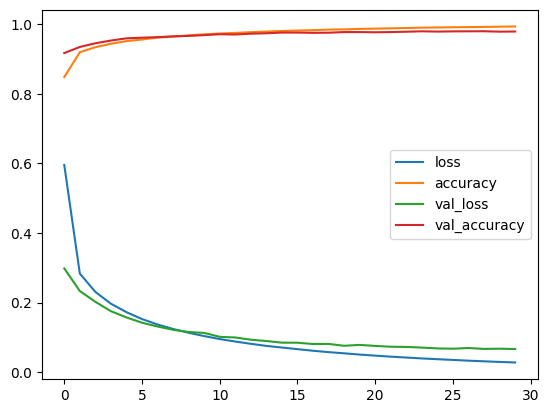

In [66]:
pd.DataFrame(history.history).plot()

# Creating layers of ANN with batch normalisation|

In [67]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [68]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)               

In [70]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [71]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.3671 - accuracy: 0.8918 - val_loss: 0.1896 - val_accuracy: 0.9460
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1783 - accuracy: 0.9475 - val_loss: 0.1532 - val_accuracy: 0.9530
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1360 - accuracy: 0.9598 - val_loss: 0.1342 - val_accuracy: 0.9608
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1126 - accuracy: 0.9661 - val_loss: 0.1271 - val_accuracy: 0.9630
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0975 - accuracy: 0.9709 - val_loss: 0.1170 - val_accuracy: 0.9658
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0822 - accuracy: 0.9754 - val_loss: 0.1110 - val_accuracy: 0.9678
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0721 - accuracy: 0.9786 - val_loss: 0.1022 - val_accurac

# Here we can draw conclusion that weith batch normalisation, our model reaches same accuracy in eraly epochs only.